In [4]:
from matplotlib.lines import Line2D
from metrics import LocalMetric
import numpy as np
import umap
import seaborn as sns
from typing_extensions import Literal
from sklearn.cluster import KMeans
from sklearn.cluster import AgglomerativeClustering
from sklearn.cluster import DBSCAN
from sklearn.manifold import TSNE
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import matplotlib.transforms as transforms
import warnings
import os
import pickle
from utils import *
from jarvis_patrick import JP
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
import warnings
import importlib
import centroids
import pickle

importlib.reload(centroids)
from centroids import compute_centroids, measure_distances, tsne_algorithms, tsne_clean, umap_algorithms, umap_clean
from metrics import *

warnings.filterwarnings("ignore", category=FutureWarning)
warnings.filterwarnings("ignore", message=".*The 'nopython' keyword.*")

In [2]:
from keras.datasets import fashion_mnist

(X_train_full, y_train_full), (X_test_full, y_test_full) = fashion_mnist.load_data()

train_images, _, train_labels, _ = train_test_split(X_train_full, y_train_full, train_size=0.1, random_state=42)
test_images, _, test_labels, _ = train_test_split(X_test_full, y_test_full, train_size=0.1, random_state=42)

In [14]:
print(train_images.shape)
print(test_images.shape)
X_train = X_train_full.reshape(X_train_full.shape[0], -1)
X_test = X_test_full.reshape(X_test_full.shape[0], -1)
print(X_train.shape)
print(X_test.shape)

(6000, 28, 28)
(1000, 28, 28)
(60000, 784)
(10000, 784)


In [3]:
y_train, y_test= train_labels, test_labels

### K-Means

In [16]:
with open('tsne_clean.pkl', 'rb') as f:
    tsne_clean = pickle.load(f)

tsne_metrics_kmeans = LocalMetric()
tsne_metrics_kmeans.calculate_knn_gain_and_dr_quality(
        X_lds=tsne_clean,
        X_hds=X_test,
        labels=y_test_full,
        method_name="{} {}".format("tsne", "clean"),
    )

Calculating d_hd
tsne clean


In [18]:
with open('tsne_global_100.pkl', 'rb') as f:
    tsne_global100 = pickle.load(f)
    
tsne_metrics_kmeans.calculate_knn_gain_and_dr_quality(
        X_lds=tsne_global100,
        X_hds=X_test,
        labels=y_test_full,
        method_name="{} {}".format("tsne + kmeans + global ", "100 centroids"),
    )

Calculating d_hd
tsne + kmeans + global  100 centroids


In [19]:
with open('tsne_global_500.pkl', 'rb') as f:
    tsne_global500 = pickle.load(f)
    
tsne_metrics_kmeans.calculate_knn_gain_and_dr_quality(
        X_lds=tsne_global500,
        X_hds=X_test,
        labels=y_test_full,
        method_name="{} {}".format("tsne + kmeans + global ", "500 centroids"),
    )

Calculating d_hd
tsne + kmeans + global  500 centroids


In [21]:
with open('tsne_global_1000.pkl', 'rb') as f:
    tsne_global1000 = pickle.load(f)
    
tsne_metrics_kmeans.calculate_knn_gain_and_dr_quality(
        X_lds=tsne_global1000,
        X_hds=X_test,
        labels=y_test_full,
        method_name="{} {}".format("tsne + kmeans + global ", "1000 centroids"),
    )

Calculating d_hd
tsne + kmeans + global  1000 centroids


Finished.


<Figure size 432x288 with 0 Axes>

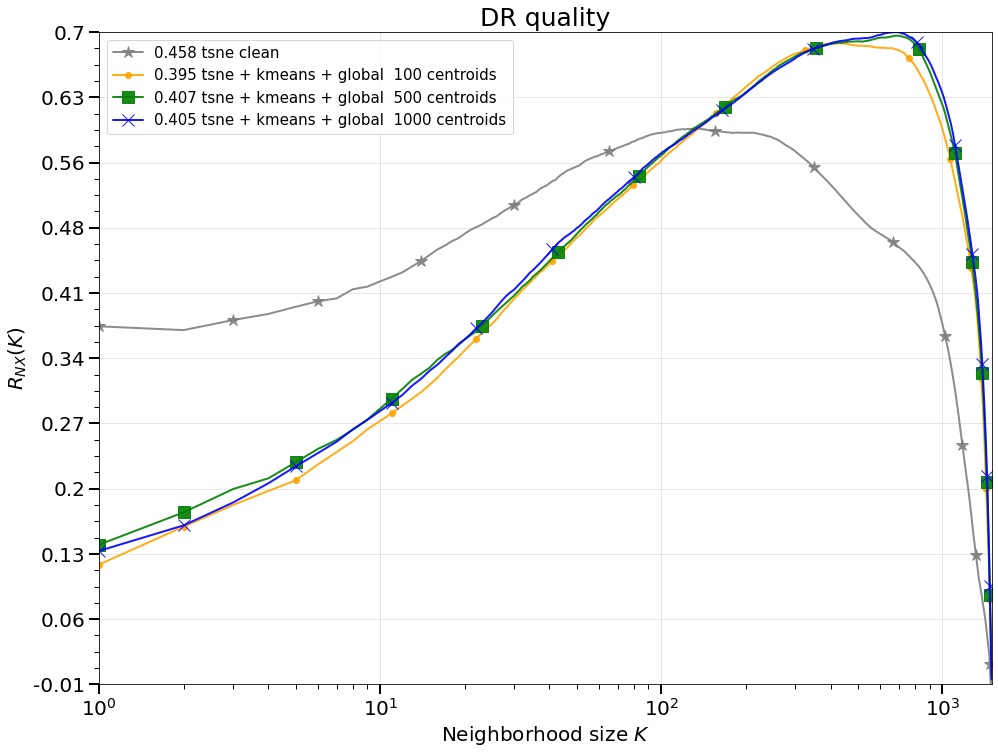

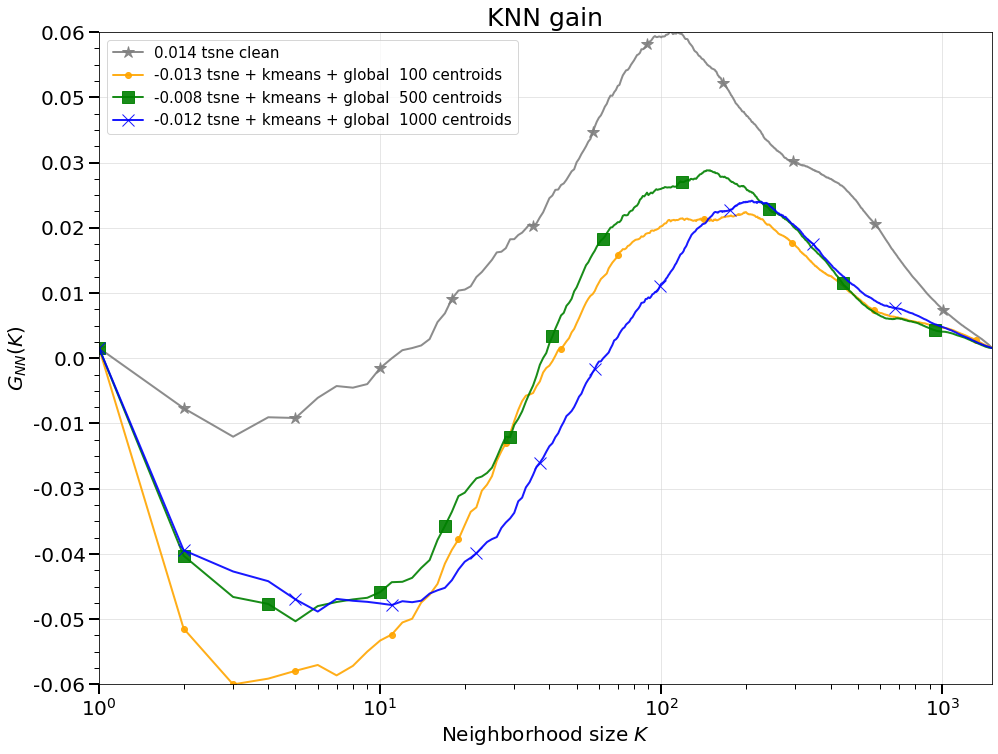

In [22]:
plt.figure()
tsne_metrics_kmeans.visualize()
plt.savefig('kmeans_global_tsne.png')

Local

In [23]:
with open('tsne_clean_local.pkl', 'rb') as f:
    tsne_clean_local = pickle.load(f)

tsne_metrics_kmeans_local = LocalMetric()
tsne_metrics_kmeans_local.calculate_knn_gain_and_dr_quality(
        X_lds=tsne_clean_local,
        X_hds=X_test,
        labels=y_test_full,
        method_name="{} {}".format("tsne", "clean"),
    )

Calculating d_hd
tsne clean


with open('tsne_local_10.pkl', 'rb') as f:
    tsne_local10 = pickle.load(f)
    
tsne_metrics_kmeans_local.calculate_knn_gain_and_dr_quality(
        X_lds=tsne_local10,
        X_hds=X_test,
        labels=y_test_full,
        method_name="{} {}".format("tsne + kmeans + local ", "10 centroids"),
    )

In [25]:
with open('tsne_local_50.pkl', 'rb') as f:
    tsne_local50 = pickle.load(f)
    
tsne_metrics_kmeans_local.calculate_knn_gain_and_dr_quality(
        X_lds=tsne_local50,
        X_hds=X_test,
        labels=y_test_full,
        method_name="{} {}".format("tsne + kmeans + local ", "50 centroids"),
    )

Calculating d_hd
tsne + kmeans + local  50 centroids


In [26]:
with open('tsne_local_100.pkl', 'rb') as f:
    tsne_local100 = pickle.load(f)
    
tsne_metrics_kmeans_local.calculate_knn_gain_and_dr_quality(
        X_lds=tsne_local100,
        X_hds=X_test,
        labels=y_test_full,
        method_name="{} {}".format("tsne + kmeans + local ", "100 centroids"),
    )

Calculating d_hd
tsne + kmeans + local  100 centroids


Finished.


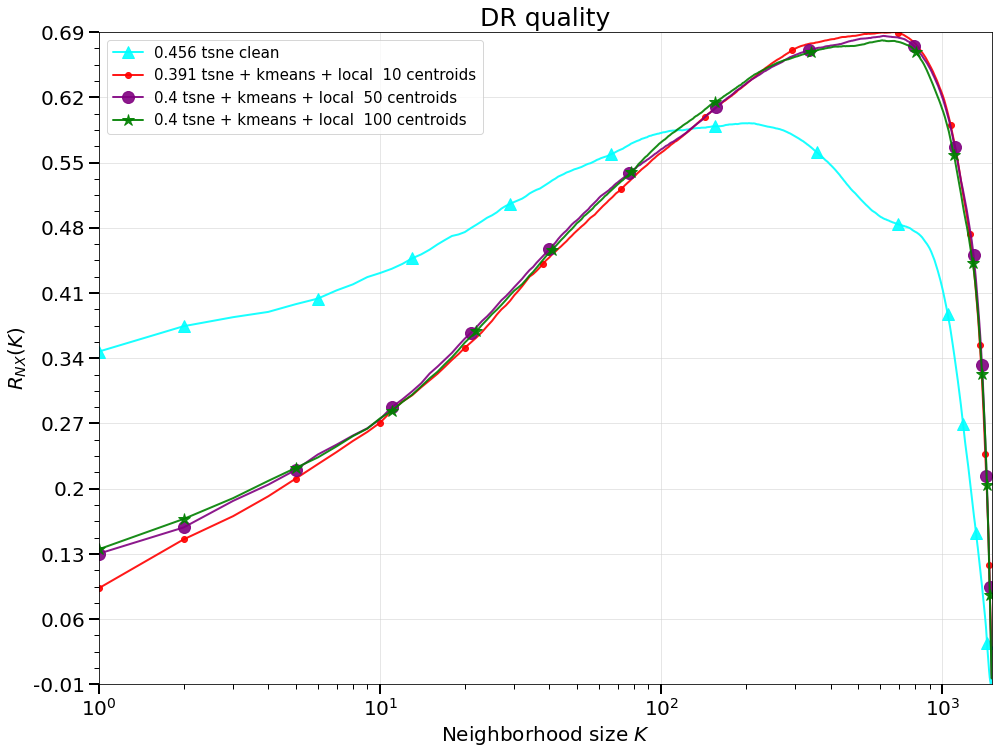

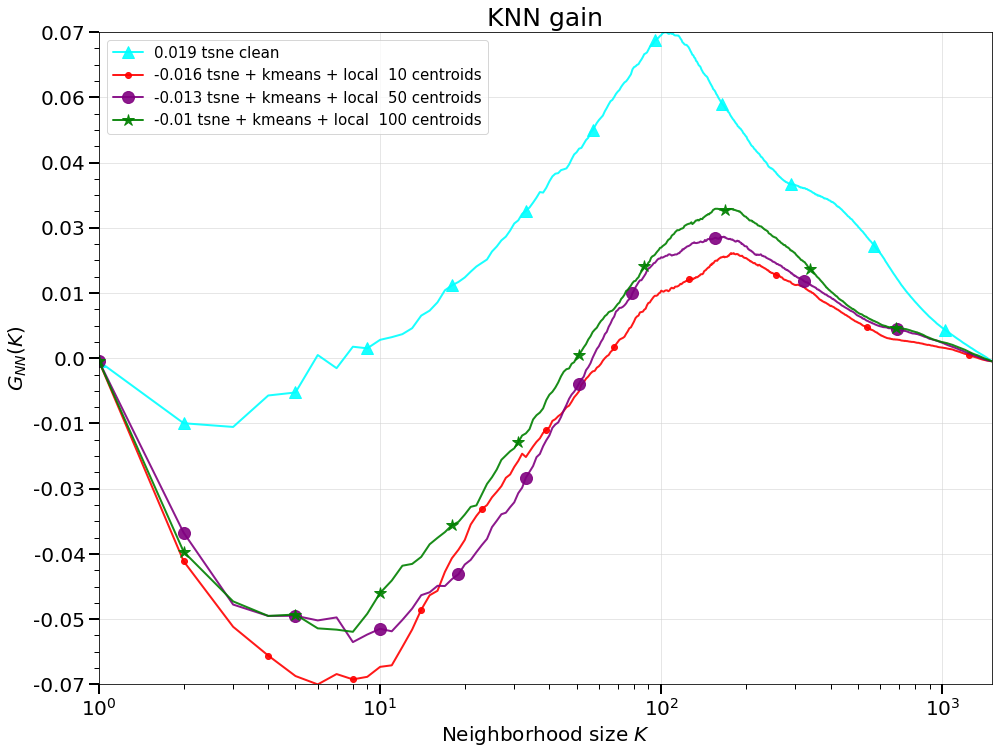

In [27]:
tsne_metrics_kmeans_local.visualize()

### Agglomerative

Global

In [39]:
with open('tsne_clean_ag.pkl', 'rb') as f:
    tsne_clean_ag = pickle.load(f)

tsne_metrics_agglomerative_global = LocalMetric()
tsne_metrics_agglomerative_global.calculate_knn_gain_and_dr_quality(
        X_lds=tsne_clean_ag,
        X_hds=X_test,
        labels=y_test_full,
        method_name="{} {}".format("tsne", "clean"),
    )

Calculating d_hd
tsne clean


In [40]:
with open('tsne_global_100_ag.pkl', 'rb') as f:
    tsne_global100ag = pickle.load(f)

tsne_metrics_agglomerative_global.calculate_knn_gain_and_dr_quality(
        X_lds=tsne_global100ag,
        X_hds=X_test,
        labels=y_test_full,
        method_name="{} {}".format("tsne + agglomerative global", "100 centroids"),
    )

Calculating d_hd
tsne + agglomerative global 100 centroids


In [41]:
with open('tsne_global_500_ag.pkl', 'rb') as f:
    tsne_global500ag = pickle.load(f)

tsne_metrics_agglomerative_global.calculate_knn_gain_and_dr_quality(
        X_lds=tsne_global500ag,
        X_hds=X_test,
        labels=y_test_full,
        method_name="{} {}".format("tsne + agglomerative global", "500 centroids"),
    )

Calculating d_hd
tsne + agglomerative global 500 centroids


In [42]:
with open('tsne_global_1000_ag.pkl', 'rb') as f:
    tsne_global1000ag = pickle.load(f)

tsne_metrics_agglomerative_global.calculate_knn_gain_and_dr_quality(
        X_lds=tsne_global1000ag,
        X_hds=X_test,
        labels=y_test_full,
        method_name="{} {}".format("tsne + agglomerative global", "1000 centroids"),
    )

Calculating d_hd
tsne + agglomerative global 1000 centroids


Finished.


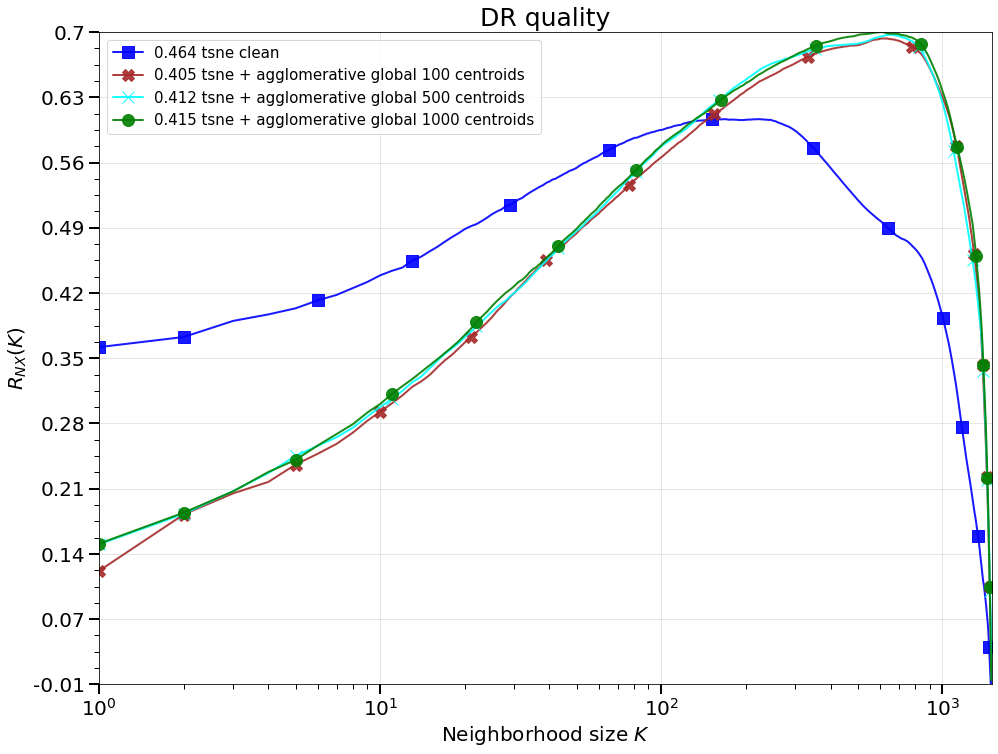

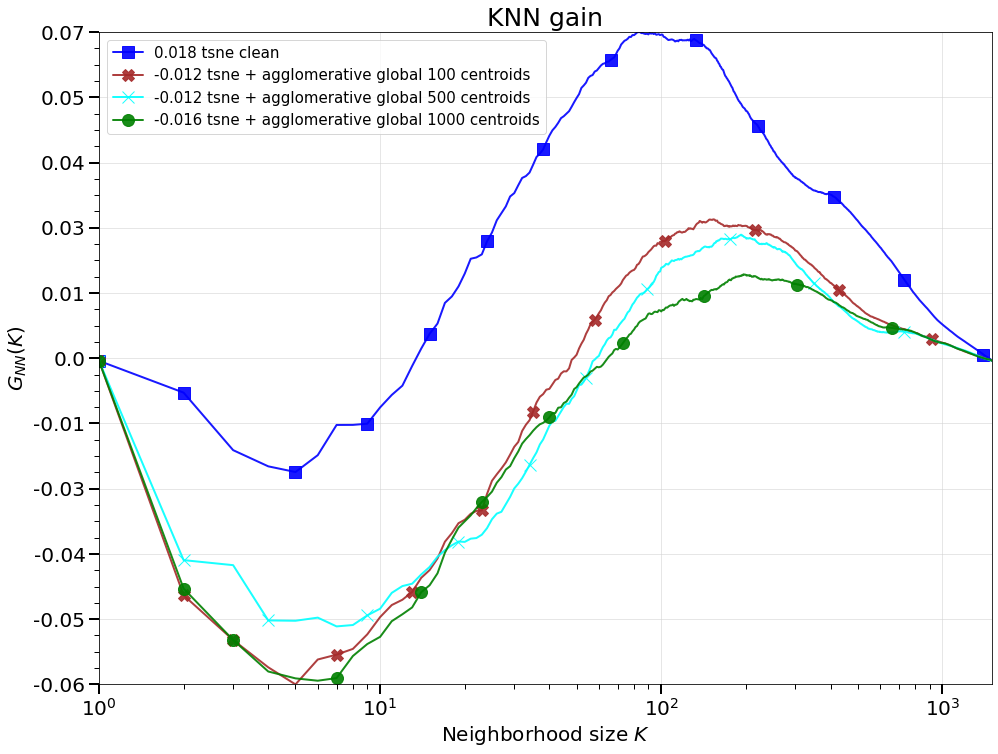

In [43]:
tsne_metrics_agglomerative_global.visualize()

Local

In [44]:
with open('tsne_clean_ag_local.pkl', 'rb') as f:
    tsne_clean_ag = pickle.load(f)

tsne_metrics_agglomerative_local = LocalMetric()
tsne_metrics_agglomerative_local.calculate_knn_gain_and_dr_quality(
        X_lds=tsne_clean_ag,
        X_hds=X_test,
        labels=y_test_full,
        method_name="{} {}".format("tsne", "clean"),
    )

Calculating d_hd
tsne clean


In [45]:
with open('tsne_local_10_ag_local.pkl', 'rb') as f:
    tsne_local10ag = pickle.load(f)

tsne_metrics_agglomerative_local.calculate_knn_gain_and_dr_quality(
        X_lds=tsne_local10ag,
        X_hds=X_test,
        labels=y_test_full,
        method_name="{} {}".format("tsne + agglomerative local", "10 centroids"),
    )

Calculating d_hd
tsne + agglomerative local 10 centroids


In [46]:
with open('tsne_local_50_ag_local.pkl', 'rb') as f:
    tsne_local50ag = pickle.load(f)

tsne_metrics_agglomerative_local.calculate_knn_gain_and_dr_quality(
        X_lds=tsne_local50ag,
        X_hds=X_test,
        labels=y_test_full,
        method_name="{} {}".format("tsne + agglomerative local", "50 centroids"),
    )

Calculating d_hd
tsne + agglomerative local 50 centroids


In [47]:
with open('tsne_local_100_ag.pkl', 'rb') as f:
    tsne_local100ag = pickle.load(f)

tsne_metrics_agglomerative_local.calculate_knn_gain_and_dr_quality(
        X_lds=tsne_local100ag,
        X_hds=X_test,
        labels=y_test_full,
        method_name="{} {}".format("tsne + agglomerative local", "100 centroids"),
    )

Calculating d_hd
tsne + agglomerative local 100 centroids


Finished.


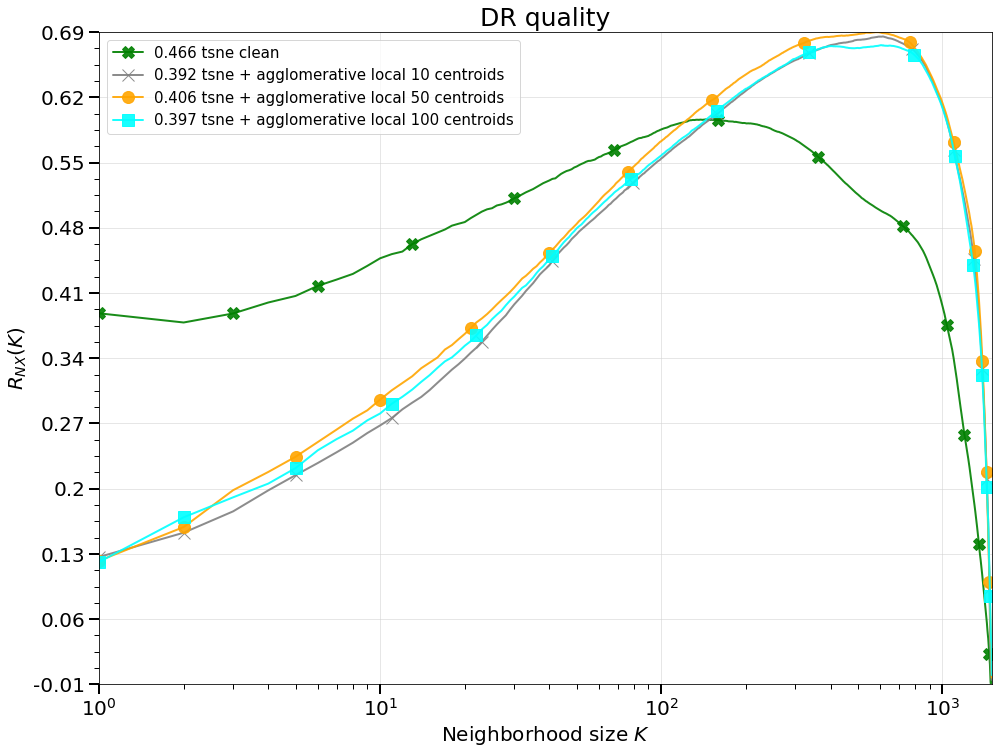

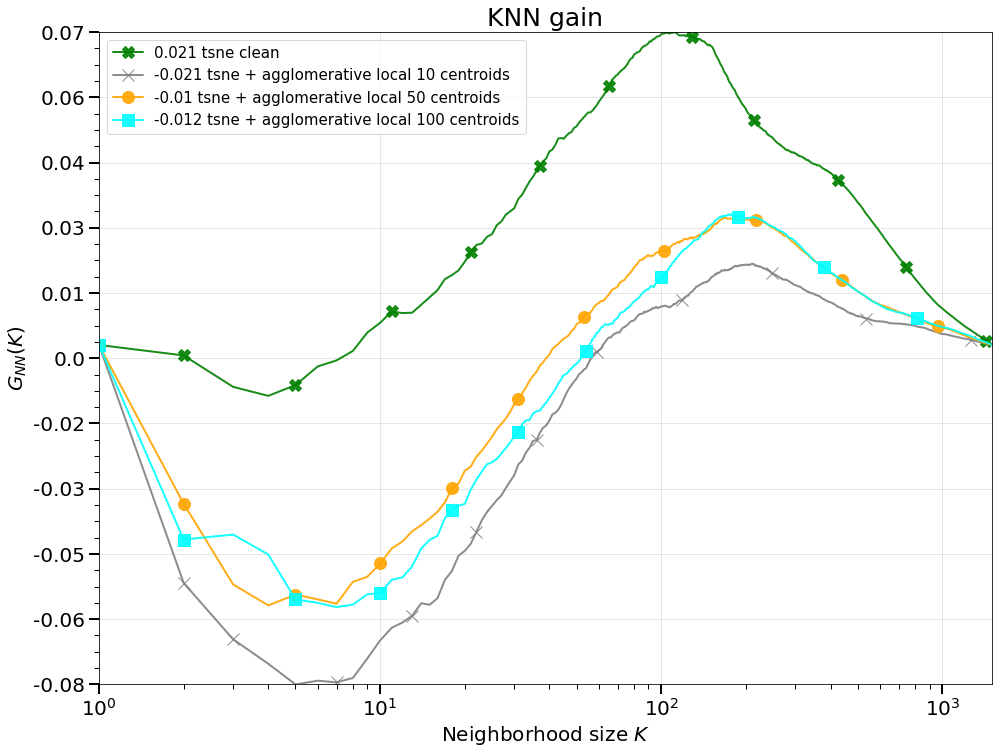

In [48]:
tsne_metrics_agglomerative_local.visualize()

### DBSCAN

Global

In [53]:
with open('tsne_clean_dbscan.pkl', 'rb') as f:
    tsne_clean_dbscan = pickle.load(f)

tsne_metrics_dbscan = LocalMetric()
tsne_metrics_dbscan.calculate_knn_gain_and_dr_quality(
        X_lds=tsne_clean_dbscan,
        X_hds=X_test,
        labels=y_test_full,
        method_name="{} {}".format("tsne", "clean"),
    )

Calculating d_hd
tsne clean


In [54]:
with open('tsne_global_10.pkl', 'rb') as f:
    tsne_dbscan_global10 = pickle.load(f)

tsne_metrics_dbscan.calculate_knn_gain_and_dr_quality(
        X_lds=tsne_dbscan_global10,
        X_hds=X_test,
        labels=y_test_full,
        method_name="{} {}".format("tsne + dbscan global", "10 centroids"),
    )

Calculating d_hd
tsne + dbscan global 10 centroids


In [55]:
with open('tsne_local_10_dbscan.pkl', 'rb') as f:
    tsne_dbscan_local10 = pickle.load(f)

tsne_metrics_dbscan.calculate_knn_gain_and_dr_quality(
        X_lds=tsne_dbscan_local10,
        X_hds=X_test,
        labels=y_test_full,
        method_name="{} {}".format("tsne + dbscan local", "10 centroids"),
    )

Calculating d_hd
tsne + dbscan local 10 centroids


Finished.


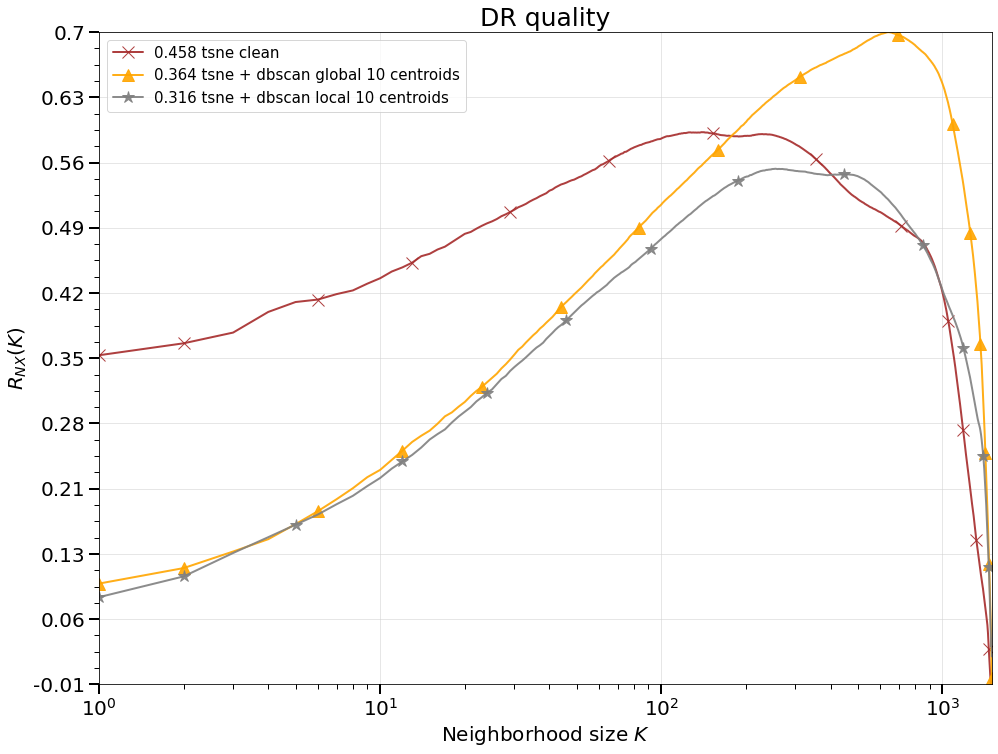

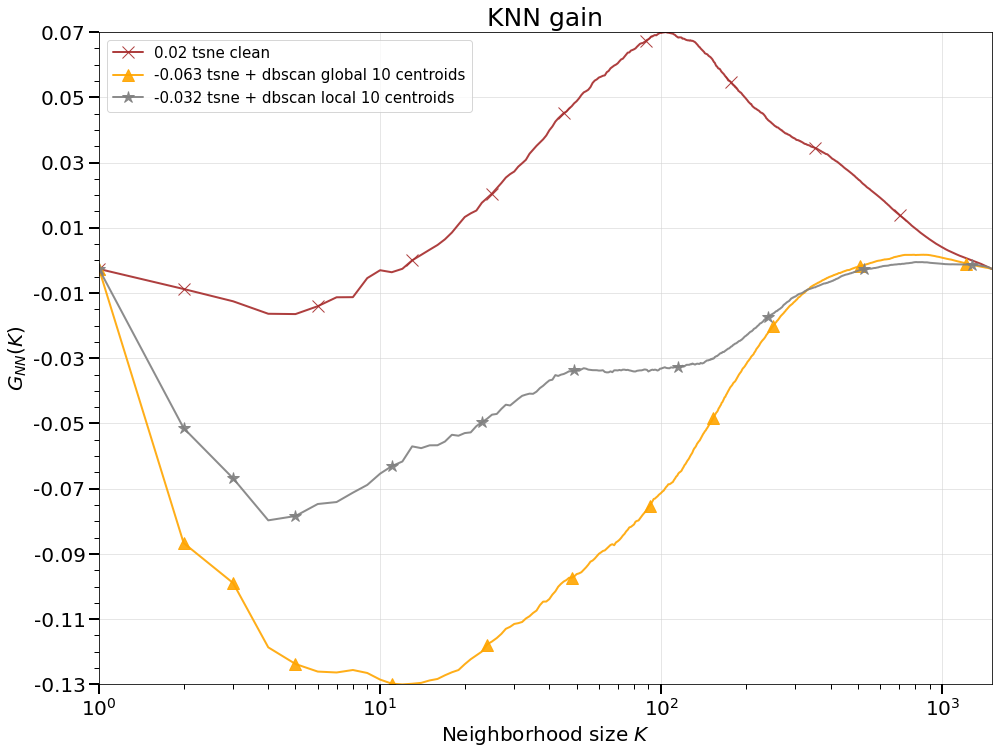

In [56]:
tsne_metrics_dbscan.visualize()

### Jarvis-Patrick

Global

In [58]:
with open('tsne_clean_jp.pkl', 'rb') as f:
    tsne_clean_jp = pickle.load(f)

tsne_metrics_jp_global = LocalMetric()
tsne_metrics_jp_global.calculate_knn_gain_and_dr_quality(
        X_lds=tsne_clean_jp,
        X_hds=X_test,
        labels=y_test_full,
        method_name="{} {}".format("tsne", "clean"),
    )

Calculating d_hd
tsne clean


In [60]:
with open('tsne_global_91.pkl', 'rb') as f:
    tsne_jp_global91 = pickle.load(f)

tsne_metrics_jp_global.calculate_knn_gain_and_dr_quality(
        X_lds=tsne_jp_global91,
        X_hds=X_test,
        labels=y_test_full,
        method_name="{} {}".format("tsne + jarvis-patrick global", "91 centroids"),
    )

Calculating d_hd
tsne + jarvis-patrick global 91 centroids


In [61]:
with open('tsne_global_507.pkl', 'rb') as f:
    tsne_jp_global507 = pickle.load(f)

tsne_metrics_jp_global.calculate_knn_gain_and_dr_quality(
        X_lds=tsne_jp_global507,
        X_hds=X_test,
        labels=y_test_full,
        method_name="{} {}".format("tsne + jarvis-patrick global", "507 centroids"),
    )

Calculating d_hd
tsne + jarvis-patrick global 507 centroids


In [62]:
with open('tsne_global_1003.pkl', 'rb') as f:
    tsne_jp_global1003 = pickle.load(f)

tsne_metrics_jp_global.calculate_knn_gain_and_dr_quality(
        X_lds=tsne_jp_global1003,
        X_hds=X_test,
        labels=y_test_full,
        method_name="{} {}".format("tsne + jarvis-patrick global", "1003 centroids"),
    )

Calculating d_hd
tsne + jarvis-patrick global 1003 centroids


Finished.


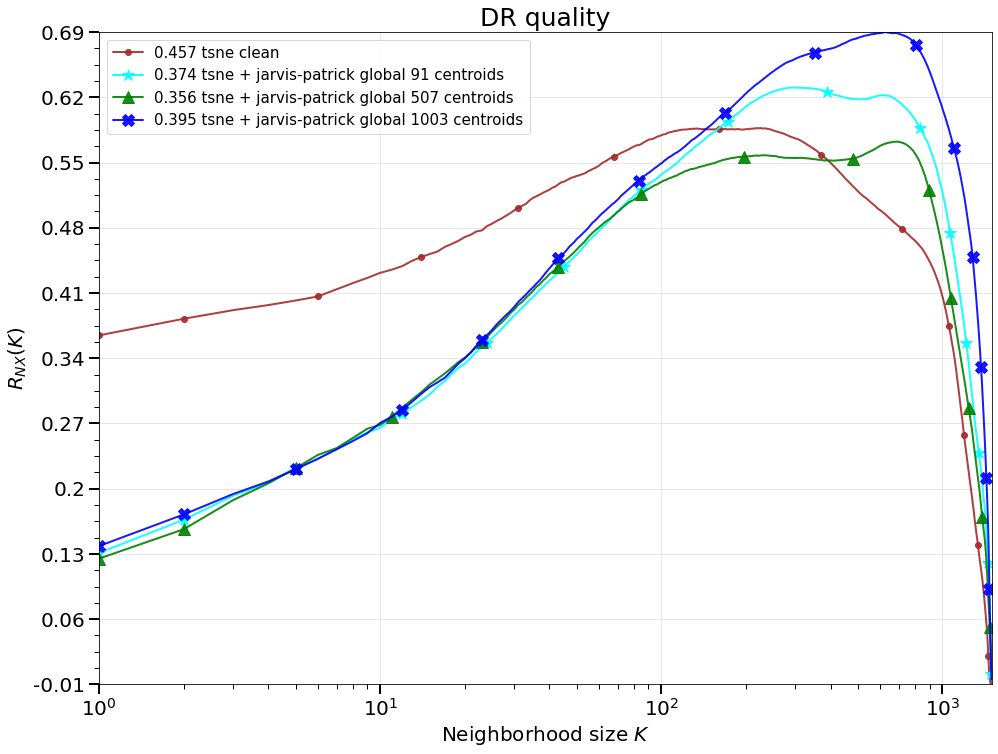

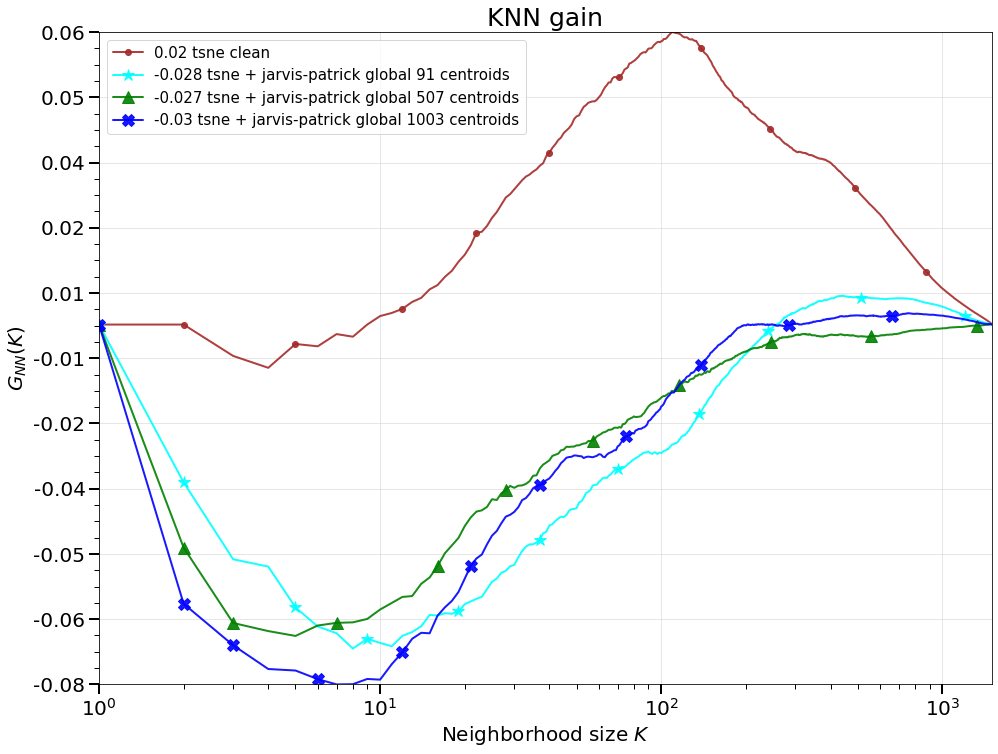

In [63]:
tsne_metrics_jp_global.visualize()

local

In [64]:
with open('tsne_clean_jp.pkl', 'rb') as f:
    tsne_clean_jp = pickle.load(f)

tsne_metrics_jp_local = LocalMetric()
tsne_metrics_jp_local.calculate_knn_gain_and_dr_quality(
        X_lds=tsne_clean_jp,
        X_hds=X_test,
        labels=y_test_full,
        method_name="{} {}".format("tsne", "clean"),
    )

Calculating d_hd
tsne clean


In [65]:
with open('tsne_local_109.pkl', 'rb') as f:
    tsne_local_jp_109 = pickle.load(f)

tsne_metrics_jp_local.calculate_knn_gain_and_dr_quality(
        X_lds=tsne_local_jp_109,
        X_hds=X_test,
        labels=y_test_full,
        method_name="{} {}".format("tsne + jp local", "109 centroids"),
    )

Calculating d_hd
tsne + jp local 109 centroids


In [66]:
with open('tsne_local_504.pkl', 'rb') as f:
    tsne_local_jp_504 = pickle.load(f)

tsne_metrics_jp_local.calculate_knn_gain_and_dr_quality(
        X_lds=tsne_local_jp_504,
        X_hds=X_test,
        labels=y_test_full,
        method_name="{} {}".format("tsne + jp local", "504 centroids"),
    )

Calculating d_hd
tsne + jp local 504 centroids


In [67]:
with open('tsne_local_991.pkl', 'rb') as f:
    tsne_local_jp_991 = pickle.load(f)

tsne_metrics_jp_local.calculate_knn_gain_and_dr_quality(
        X_lds=tsne_local_jp_991,
        X_hds=X_test,
        labels=y_test_full,
        method_name="{} {}".format("tsne + jp local", "991 centroids"),
    )

Calculating d_hd
tsne + jp local 991 centroids


Finished.


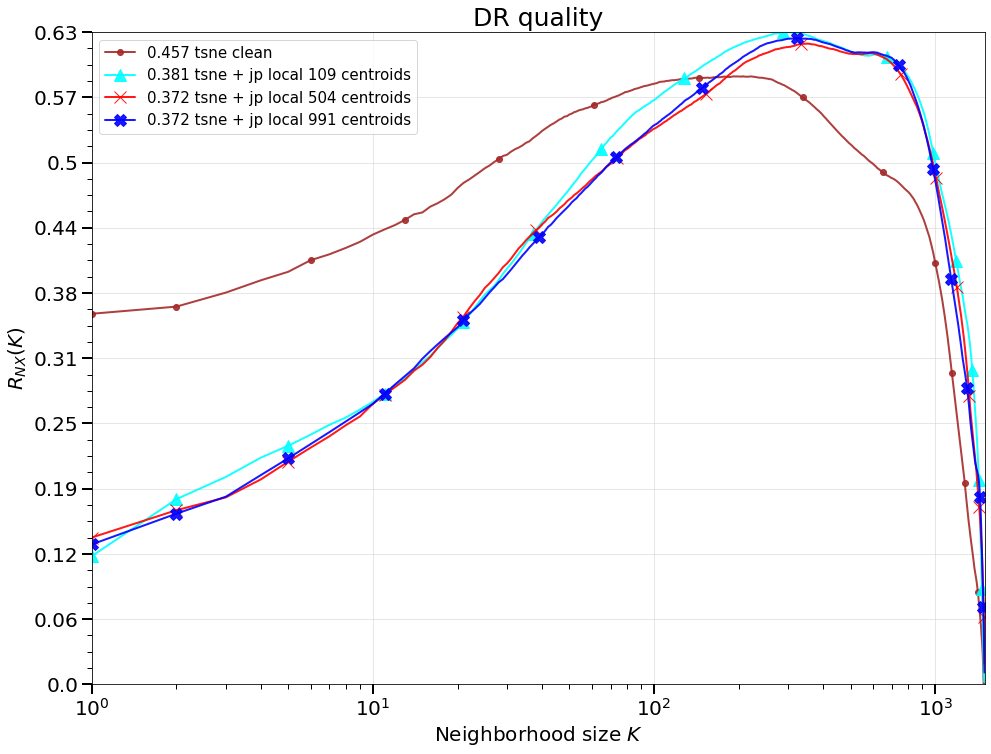

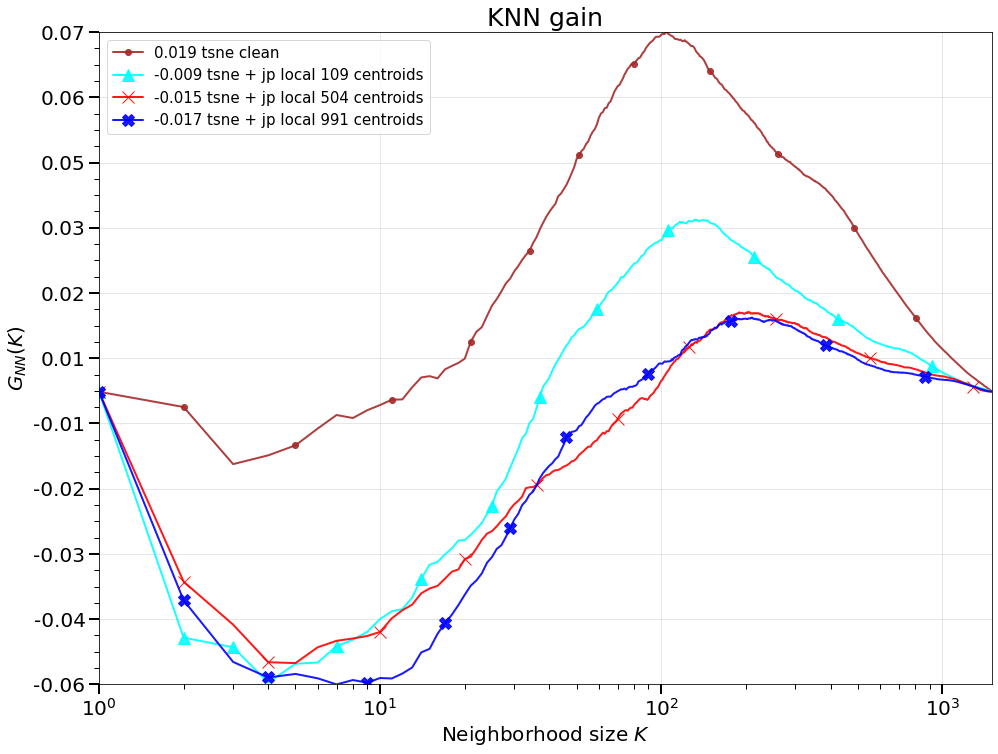

In [68]:
tsne_metrics_jp_local.visualize()